In [157]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

In [158]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

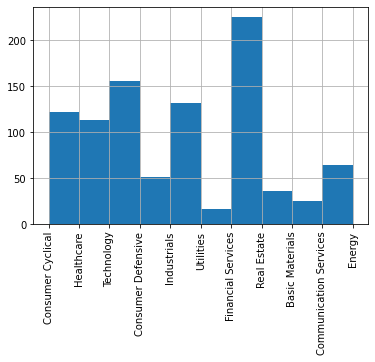

In [159]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [160]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [161]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [162]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [163]:
len(rows)

476

In [164]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [165]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [166]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [167]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [168]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [169]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering stocks based on volatility

In [170]:
df_BM = df_BM[df_BM["AHV_5y"] < 0.3]

In [171]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.77,0.111741,3.430530e+10,...,1.04,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.96,0.140960,3.488845e+10,...,1.15,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,0.62,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634


## Filtering Stocks based on Sharpe Ratio

In [172]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [173]:
sharpe_list

[0.133, 0.287, 0.46]

In [174]:
df_BM["sharpe"] = sharpe_list
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.77,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.133
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.96,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.287
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.460


In [175]:
df_BM = df_BM[df_BM["sharpe"] > 0.3]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.86,0.24,33.410503,48.947556,137.905521,999.0,0.094567,0.285427,0.108634,0.46


# Consumer Defensive

## Filtering stocks based on volatility

In [176]:
df_CD = df_CD[df_CD["AHV_5y"] < 0.3]

In [177]:
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,0.79,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,0.62,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,0.59,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,0.74,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419
897,TWNK,"Hostess Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,21.18,0.082395,2.930825e+09,...,0.69,0.626,0.1008,22.531916,33.833866,7.144818,999.00,0.103076,0.279978,0.076044


## Filtering Stocks based on Sharpe Ratio

In [178]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [179]:
sharpe_list

[0.026, 0.139, 0.054, 0.343, 0.287]

In [180]:
df_CD["sharpe"] = sharpe_list
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.026
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.139
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.054
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.343
897,TWNK,"Hostess Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,21.18,0.082395,2.930825e+09,...,0.626,0.1008,22.531916,33.833866,7.144818,999.00,0.103076,0.279978,0.076044,0.287


In [181]:
df_CD = df_CD[df_CD["sharpe"] > 0.3]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.0,0.109154,0.295493,0.110419,0.343


# Real Estate Sector

## Filtering stocks based on volatility

In [182]:
df_RE = df_RE[df_RE["AHV_5y"] < 0.3]

In [183]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,0.36,4.743,0.3700,88.100910,143.58423,1645.638404,14.71,0.062961,0.272286,0.148163
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,0.31,2.606,1.8932,74.663315,114.02917,599909.754404,14.52,0.056883,0.267604,0.237268


## Filtering Stocks based on Sharpe Ratio

In [184]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [185]:
sharpe_list

[0.562, 0.821]

In [186]:
df_RE["sharpe"] = sharpe_list
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.58423,1645.638404,14.71,0.062961,0.272286,0.148163,0.562
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.02917,599909.754404,14.52,0.056883,0.267604,0.237268,0.821


In [187]:
df_RE = df_RE[df_RE["sharpe"] > 0.3]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.58423,1645.638404,14.71,0.062961,0.272286,0.148163,0.562
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.02917,599909.754404,14.52,0.056883,0.267604,0.237268,0.821


# Financial Services

## Filtering stocks based on volatility

In [188]:
df_FS = df_FS[df_FS["AHV_5y"] < 0.3]

In [189]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.740,0.123563,4.603126e+10,...,1.15,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724
315,CFFN,"Capitol Federal Financial, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,11.060,0.053751,1.535615e+09,...,0.29,0.560,0.0500,19.403510,19.750000,2.438643,999.00,0.054452,0.257685,-0.014906
578,KRNY,Kearny Financial,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.170,0.075242,9.884085e+08,...,0.81,0.900,0.0400,13.438775,14.633334,2.664252,999.00,0.117663,0.295281,-0.012663
813,SEIC,SEI Investments Company,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,58.795,0.129859,8.199138e+09,...,1.09,3.652,0.1200,14.410539,16.099398,23.173522,18.96,0.151699,0.285469,0.041919


## Filtering Stocks based on Sharpe Ratio

In [190]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [191]:
sharpe_list

[0.256, 0.07, 0.069, 0.235]

In [192]:
df_FS["sharpe"] = sharpe_list
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.740,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.256
315,CFFN,"Capitol Federal Financial, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,11.060,0.053751,1.535615e+09,...,0.560,0.0500,19.403510,19.750000,2.438643,999.00,0.054452,0.257685,-0.014906,0.070
578,KRNY,Kearny Financial,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.170,0.075242,9.884085e+08,...,0.900,0.0400,13.438775,14.633334,2.664252,999.00,0.117663,0.295281,-0.012663,0.069
813,SEIC,SEI Investments Company,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,58.795,0.129859,8.199138e+09,...,3.652,0.1200,14.410539,16.099398,23.173522,18.96,0.151699,0.285469,0.041919,0.235


In [193]:
df_FS = df_FS[df_FS["sharpe"] > 0.3]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Consumer Cyclical Sector

## Filtering stocks based on volatility

In [194]:
df_CC = df_CC[df_CC["AHV_5y"] < 0.3]

In [195]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.89,0.103717,1.778708e+10,...,1.08,5.609,0.046,17.202478,22.266000,26.607388,12.53,0.150484,0.294242,0.076618
483,GNTX,Gentex Corporation,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,30.18,0.108478,7.138173e+09,...,0.95,1.732,0.158,15.242424,17.424942,16.061485,23.49,0.134681,0.277421,0.098497
828,SLGN,Silgan Holdings Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,41.91,0.082411,4.627283e+09,...,0.80,3.009,0.064,11.235925,13.928215,10.410743,999.00,0.116447,0.216376,0.078010


## Filtering Stocks based on Sharpe Ratio

In [196]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [197]:
sharpe_list

[0.402, 0.361, 0.47]

In [198]:
df_CC["sharpe"] = sharpe_list
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.89,0.103717,1.778708e+10,...,5.609,0.046,17.202478,22.266000,26.607388,12.53,0.150484,0.294242,0.076618,0.402
483,GNTX,Gentex Corporation,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,30.18,0.108478,7.138173e+09,...,1.732,0.158,15.242424,17.424942,16.061485,23.49,0.134681,0.277421,0.098497,0.361
828,SLGN,Silgan Holdings Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,41.91,0.082411,4.627283e+09,...,3.009,0.064,11.235925,13.928215,10.410743,999.00,0.116447,0.216376,0.078010,0.470


In [199]:
df_CC = df_CC[df_CC["sharpe"] > 0.3]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.89,0.103717,1.778708e+10,...,5.609,0.046,17.202478,22.266000,26.607388,12.53,0.150484,0.294242,0.076618,0.402
483,GNTX,Gentex Corporation,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,30.18,0.108478,7.138173e+09,...,1.732,0.158,15.242424,17.424942,16.061485,23.49,0.134681,0.277421,0.098497,0.361
828,SLGN,Silgan Holdings Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,41.91,0.082411,4.627283e+09,...,3.009,0.064,11.235925,13.928215,10.410743,999.00,0.116447,0.216376,0.078010,0.470


# Technology

## Filtering stocks based on volatility

In [200]:
df_tech = df_tech[df_tech["AHV_5y"] < 0.3]

In [201]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.76,0.098598,4.556764e+10,...,1.13,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.26,0.115413,1.983076e+11,...,0.81,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510
322,CHKP,Check Point Software Technologi,Technology,Increase,Above Fair Price,UnderValued,Not Sustainable,133.69,0.086143,1.775377e+10,...,0.74,6.136,0.0659,18.213896,21.787810,33.747106,20.39,0.109154,0.246268,0.068146
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.62,0.240316,5.893862e+09,...,1.03,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617
718,OTEX,Open Text Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,42.50,0.123215,1.154151e+10,...,0.98,1.240,0.0931,9.361234,34.274193,13.459143,14.99,0.138328,0.253003,0.068191
776,RDWR,Radware Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,30.86,0.061908,1.419520e+09,...,0.91,0.340,0.1500,35.471264,90.764710,15.430001,999.00,0.129819,0.265764,0.170660


## Filtering Stocks based on Sharpe Ratio

In [202]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [203]:
sharpe_list

[0.421, 0.562, 0.292, 0.879, 0.285, 0.581]

In [204]:
df_tech["sharpe"] = sharpe_list
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.76,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.421
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.26,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.562
322,CHKP,Check Point Software Technologi,Technology,Increase,Above Fair Price,UnderValued,Not Sustainable,133.69,0.086143,1.775377e+10,...,6.136,0.0659,18.213896,21.787810,33.747106,20.39,0.109154,0.246268,0.068146,0.292
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.62,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.879
718,OTEX,Open Text Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,42.50,0.123215,1.154151e+10,...,1.240,0.0931,9.361234,34.274193,13.459143,14.99,0.138328,0.253003,0.068191,0.285
776,RDWR,Radware Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,30.86,0.061908,1.419520e+09,...,0.340,0.1500,35.471264,90.764710,15.430001,999.00,0.129819,0.265764,0.170660,0.581


In [205]:
df_tech = df_tech[df_tech["sharpe"] > 0.3]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.76,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.421
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.26,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.562
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.62,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.879
776,RDWR,Radware Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,30.86,0.061908,1.419520e+09,...,0.340,0.1500,35.471264,90.764710,15.430001,999.00,0.129819,0.265764,0.170660,0.581


# Industrials

## Filtering stocks based on volatility

In [206]:
df_industrials = df_industrials[df_industrials["AHV_5y"] < 0.3]

In [207]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,1.31,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,0.76,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,1.03,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,1.08,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,0.82,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099
113,JCI,Johnson Controls International,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,65.5950,0.143848,4.620066e+10,...,1.10,2.272,0.1933,18.741428,28.871038,45.741135,13.64,0.152915,0.274845,0.111388
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.6500,0.203961,4.329704e+10,...,0.87,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286
142,MMM,3M Company,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,147.9500,0.083190,8.525663e+10,...,0.95,10.111,0.0772,14.267117,14.632578,41.064969,34.88,0.134681,0.253266,-0.007437
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.8600,0.310243,3.310706e+10,...,1.02,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658


## Filtering Stocks based on Sharpe Ratio

In [208]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [209]:
sharpe_list

[0.394,
 0.764,
 0.379,
 0.401,
 0.348,
 0.748,
 0.493,
 0.734,
 -0.016,
 1.223,
 0.505,
 -0.173,
 0.457,
 0.547]

In [210]:
df_industrials["sharpe"] = sharpe_list
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.394
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.379
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.401
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.348
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.748
113,JCI,Johnson Controls International,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,65.5950,0.143848,4.620066e+10,...,2.272,0.1933,18.741428,28.871038,45.741135,13.64,0.152915,0.274845,0.111388,0.493
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.6500,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.734
142,MMM,3M Company,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,147.9500,0.083190,8.525663e+10,...,10.111,0.0772,14.267117,14.632578,41.064969,34.88,0.134681,0.253266,-0.007437,-0.016
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.8600,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.223


In [211]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.3]
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.394
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.379
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.401
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.348
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.748
113,JCI,Johnson Controls International,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,65.5950,0.143848,4.620066e+10,...,2.272,0.1933,18.741428,28.871038,45.741135,13.64,0.152915,0.274845,0.111388,0.493
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.6500,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.734
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.8600,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.223
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.8450,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.505


# Healthcare

## Filtering stocks based on volatility

In [212]:
df_healthcare = df_healthcare[df_healthcare["AHV_5y"] < 0.3]

In [213]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.25,0.264338,1.792787e+10,...,0.87,2.939,0.2548,19.152174,74.940460,241.421516,999.0,0.124956,0.296964,0.223068
740,PINC,"Premier, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,35.81,0.017970,4.363807e+09,...,0.29,2.128,0.0569,13.262963,16.828009,8.375271,999.0,0.054452,0.281507,0.026264
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.89,0.073491,1.329406e+11,...,0.46,2.787,0.1030,12.357476,18.977396,18.165303,999.0,0.075117,0.217861,0.089328


## Filtering Stocks based on Sharpe Ratio

In [214]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [215]:
sharpe_list

[0.821, 0.205, 0.328]

In [216]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.25,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.0,0.124956,0.296964,0.223068,0.821
740,PINC,"Premier, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,35.81,0.017970,4.363807e+09,...,2.128,0.0569,13.262963,16.828009,8.375271,999.0,0.054452,0.281507,0.026264,0.205
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.89,0.073491,1.329406e+11,...,2.787,0.1030,12.357476,18.977396,18.165303,999.0,0.075117,0.217861,0.089328,0.328


In [217]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.3]
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.25,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.0,0.124956,0.296964,0.223068,0.821
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.89,0.073491,1.329406e+11,...,2.787,0.1030,12.357476,18.977396,18.165303,999.0,0.075117,0.217861,0.089328,0.328


# Communication Services

## Filtering stocks based on volatility

In [218]:
df_CS = df_CS[df_CS["AHV_5y"] < 0.3]

In [219]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.160,0.123105,2.556808e+10,...,0.97,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367
824,SIRI,Sirius XM Holdings Inc.,Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,6.015,0.117463,2.405693e+10,...,1.00,0.077,0.1080,17.691175,78.116880,2.151706,17.18,0.140759,0.294468,0.055024


## Filtering Stocks based on Sharpe Ratio

In [220]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [221]:
sharpe_list

[0.407, 0.276]

In [222]:
df_CS["sharpe"] = sharpe_list
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.160,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367,0.407
824,SIRI,Sirius XM Holdings Inc.,Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,6.015,0.117463,2.405693e+10,...,0.077,0.1080,17.691175,78.116880,2.151706,17.18,0.140759,0.294468,0.055024,0.276


In [223]:
df_CS = df_CS[df_CS["sharpe"] > 0.3]
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.16,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.0,0.137112,0.276357,0.108367,0.407


# Energy

## Filtering stocks based on volatility

In [224]:
df_energy = df_energy[df_energy["AHV_5y"] < 0.3]

In [225]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y


## Filtering Stocks based on Sharpe Ratio

In [226]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [227]:
sharpe_list

[]

In [228]:
df_energy["sharpe"] = sharpe_list
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


In [229]:
df_energy = df_energy[df_energy["sharpe"] > 0.3]
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Utilities

## Filtering stocks based on volatility

In [233]:
df_utilities = df_utilities[df_utilities["AHV_5y"] < 0.3]

In [234]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,0.61,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782


## Filtering Stocks based on Sharpe Ratio

In [235]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [236]:
sharpe_list

[0.514]

In [237]:
df_utilities["sharpe"] = sharpe_list
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.514


In [238]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.3]
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.514


# Putting everything into 1 DF

In [239]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.86,0.24,33.410503,48.947556,137.905521,999.0,0.094567,0.285427,0.108634,0.46


In [240]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.58423,1645.638404,14.71,0.062961,0.272286,0.148163,0.562
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.02917,599909.754404,14.52,0.056883,0.267604,0.237268,0.821


In [241]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


In [242]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.89,0.103717,1.778708e+10,...,5.609,0.046,17.202478,22.266000,26.607388,12.53,0.150484,0.294242,0.076618,0.402
483,GNTX,Gentex Corporation,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,30.18,0.108478,7.138173e+09,...,1.732,0.158,15.242424,17.424942,16.061485,23.49,0.134681,0.277421,0.098497,0.361
828,SLGN,Silgan Holdings Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,41.91,0.082411,4.627283e+09,...,3.009,0.064,11.235925,13.928215,10.410743,999.00,0.116447,0.216376,0.078010,0.470


In [243]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.76,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.421
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.26,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.562
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.62,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.879
776,RDWR,Radware Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,30.86,0.061908,1.419520e+09,...,0.340,0.1500,35.471264,90.764710,15.430001,999.00,0.129819,0.265764,0.170660,0.581


In [244]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.394
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.379
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.401
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.348
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.748
113,JCI,Johnson Controls International,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,65.5950,0.143848,4.620066e+10,...,2.272,0.1933,18.741428,28.871038,45.741135,13.64,0.152915,0.274845,0.111388,0.493
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.6500,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.734
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.8600,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.223
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.8450,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.505


In [245]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.25,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.0,0.124956,0.296964,0.223068,0.821
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.89,0.073491,1.329406e+11,...,2.787,0.1030,12.357476,18.977396,18.165303,999.0,0.075117,0.217861,0.089328,0.328


In [246]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.16,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.0,0.137112,0.276357,0.108367,0.407


In [247]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


In [248]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.514


In [249]:
final_df_income = pd.concat([df_utilities, df_energy, df_CS, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE, df_BM])
final_df_income

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.514
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.1600,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367,0.407
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.821
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.8900,0.073491,1.329406e+11,...,2.787,0.1030,12.357476,18.977396,18.165303,999.00,0.075117,0.217861,0.089328,0.328
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.394
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.379
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.401
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.348
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.748


# Correlation

In [250]:
returns_list = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [251]:
returns_list

[Symbols          ETR
 Date                
 2017-03-24       NaN
 2017-03-27 -0.004296
 2017-03-28 -0.003906
 2017-03-29 -0.008072
 2017-03-30 -0.012498
 ...              ...
 2022-03-18  0.424945
 2022-03-21  0.442130
 2022-03-22  0.427939
 2022-03-23  0.443171
 2022-03-24  0.467648
 
 [1260 rows x 1 columns],
 Symbols        LBRDA
 Date                
 2017-03-24       NaN
 2017-03-27 -0.003901
 2017-03-28 -0.001537
 2017-03-29  0.000946
 2017-03-30  0.008629
 ...              ...
 2022-03-18  0.621749
 2022-03-21  0.609456
 2022-03-22  0.628014
 2022-03-23  0.601655
 2022-03-24  0.593026
 
 [1260 rows x 1 columns],
 Symbols         ICLR
 Date                
 2017-03-24       NaN
 2017-03-27  0.000380
 2017-03-28  0.015961
 2017-03-29  0.022549
 2017-03-30  0.016848
 ...              ...
 2022-03-18  2.033950
 2022-03-21  2.030403
 2022-03-22  2.080314
 2022-03-23  1.976944
 2022-03-24  2.010134
 
 [1260 rows x 1 columns],
 Symbols          SNY
 Date                
 2017-03-24   

In [252]:
len(returns_list)

26

In [253]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ETR,LBRDA,ICLR,SNY,ALLE,AME,CHRW,CMI,GD,J,...,CTSH,ORCL,DSGX,RDWR,GPC,GNTX,SLGN,EQIX,SBAC,BCPC
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.004296,-0.003901,0.000380,0.016805,-0.002132,0.001498,-0.005809,-0.007362,-0.010826,-0.007944,...,0.001535,0.004255,-0.006522,-0.009907,-0.000862,-0.000954,-0.007042,-0.010539,-0.004142,0.003086
2017-03-28,-0.003906,-0.001537,0.015961,0.016133,0.000933,0.009547,0.000645,0.006102,0.004906,0.001108,...,0.007165,0.000896,-0.019565,-0.006811,0.002801,0.007153,-0.002180,-0.008323,0.002198,0.009877
2017-03-29,-0.008072,0.000946,0.022549,0.014340,0.004797,0.014414,-0.002323,0.006235,0.004106,0.018105,...,0.007847,-0.002912,-0.006522,-0.010526,-0.001831,0.004769,-0.004359,0.015228,0.012596,0.008519
2017-03-30,-0.012498,0.008629,0.016848,0.004929,0.010793,0.013104,0.002323,0.007893,0.006719,0.022169,...,0.010577,0.000672,-0.010870,-0.003096,-0.005386,0.020029,-0.005366,0.023319,0.005326,0.020741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,0.424945,0.621749,2.033950,0.167152,0.574150,1.522651,0.354202,0.371294,0.227762,1.608904,...,0.564654,0.829339,2.360000,0.977709,0.389487,0.411063,0.508719,0.886830,1.795080,0.730864
2022-03-21,0.442130,0.609456,2.030403,0.141609,0.562292,1.521340,0.359365,0.367314,0.258906,1.584334,...,0.559024,0.813214,2.326522,1.021053,0.381732,0.385312,0.545942,0.849442,1.769465,0.728272
2022-03-22,0.427939,0.628014,2.080314,0.158638,0.565223,1.520030,0.369304,0.390661,0.268291,1.554775,...,0.588536,0.832027,2.425217,1.046440,0.380440,0.401526,0.544266,0.852921,1.728295,0.726543


<AxesSubplot:xlabel='Date'>

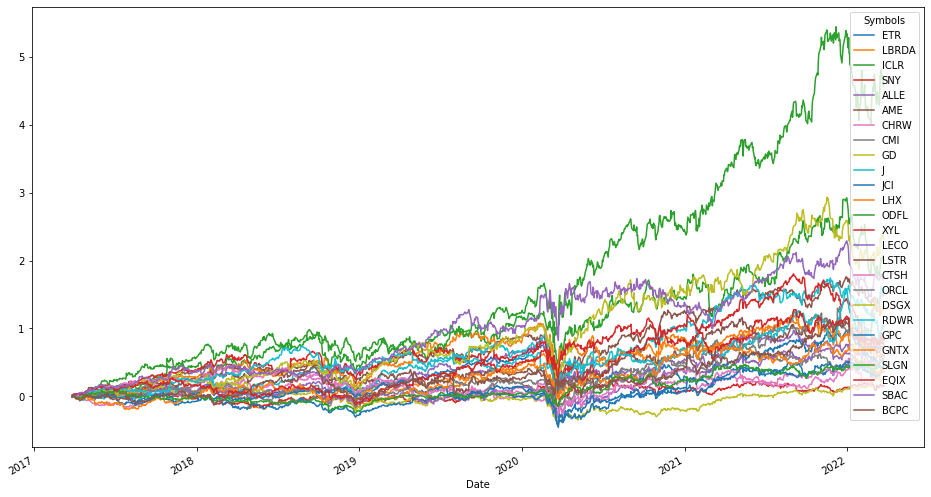

In [254]:
return_series_close.plot(figsize=(16,9))

In [255]:
return_series_close.tail(1)

Symbols,ETR,LBRDA,ICLR,SNY,ALLE,AME,CHRW,CMI,GD,J,...,CTSH,ORCL,DSGX,RDWR,GPC,GNTX,SLGN,EQIX,SBAC,BCPC
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,0.467648,0.593026,2.010134,0.146986,0.5002,1.480345,0.373048,0.387809,0.285196,1.560872,...,0.555612,0.841881,2.315652,1.026006,0.379685,0.375775,0.514755,0.833673,1.750951,0.692346


In [256]:
correlation = return_series_close.corr()
# # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [257]:
correlation = correlation[correlation < 0.2]
correlation.dropna(thresh=1, inplace=True, axis=1)
correlation.dropna(thresh=1, inplace=True, axis=0)

In [258]:
correlation

Symbols,ETR,LBRDA,ICLR,SNY,ALLE,AME,CHRW,CMI,GD,J,...,LSTR,CTSH,ORCL,DSGX,RDWR,GNTX,SLGN,EQIX,SBAC,BCPC
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,NaN,NaN,NaN,NaN,NaN,NaN,0.168541,NaN,-0.229836,NaN,...,NaN,-0.116580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LBRDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.168408,NaN,...,NaN,0.197407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013785,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNY,NaN,NaN,NaN,NaN,NaN,NaN,0.131143,NaN,-0.107930,NaN,...,NaN,0.051787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.040509,NaN,...,NaN,0.159764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022664,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHRW,0.168541,NaN,NaN,0.131143,NaN,NaN,NaN,NaN,0.161091,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GD,-0.229836,-0.168408,-0.013785,-0.107930,-0.040509,0.022664,0.161091,0.00517,NaN,0.004621,...,0.109554,NaN,0.189607,-0.042907,0.08973,-0.078634,0.039154,-0.259827,-0.267968,0.149429


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

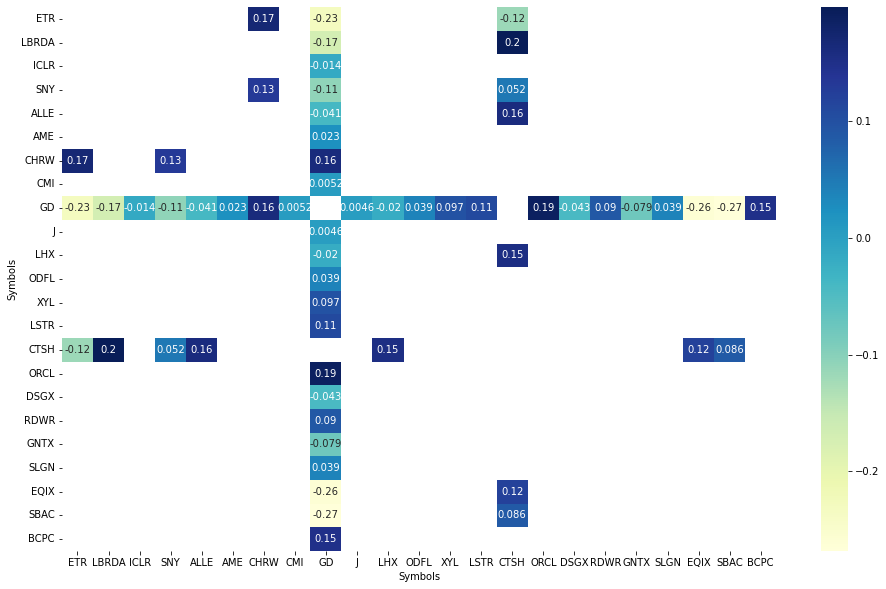

In [259]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [263]:
len(correlation)

23

In [264]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [265]:
len(all_stocks)

23

In [266]:
indexes = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [267]:
final_income_df = final_df_income.iloc[indexes]
final_income_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.514
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.1600,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367,0.407
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.821
839,SNY,Sanofi,Healthcare,Increase,Above Fair Price,UnderValued,No Data,52.8900,0.073491,1.329406e+11,...,2.787,0.1030,12.357476,18.977396,18.165303,999.00,0.075117,0.217861,0.089328,0.328
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.394
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.379
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.401
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.348
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.748


In [268]:
final_income_df.to_csv("selected_stocks_income_v3.csv")